# Figure 4. Hierarchical Bayesian model illustration

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from data import load_data
from utils import compute_ensemble_bias, vonmises_pdf, circmean, compute_trial_mean, round_df_angles, min_angle, compute_bias_ols
from vis import plot_ensemble_bias_by_response, plot_ensemble_bias_by_set_size, get_colorwheel, set_axes_rad, set_export_style, set_axes_aspect, plot_hbm_illustration, plot_data_bias, paired_hist, plot_shaded_error, FREE_COLOR, RAND_COLOR, KAPPA_OBS_PALETTE, plot_model_bias, plot_bias_ols_by_response, plot_bias_ols_by_k
from models import fit_vm_by_sub, load_hbm_fit, compute_relative_error, phase_locked_sine, fit_phase_locked_sine, bootstrap_sine_fit, bootstrap_sine_fit_by_sub

save_fig = False

### Load data

In [2]:
## Data loading ##
modality = 'color'

# continuous datasets
df_free_cont = load_data(modality=modality, condition='free', dataset='continuous')
df_rand_cont = load_data(modality=modality, condition='rand', dataset='continuous')

# discrete datasets
df_free_disc = load_data(modality=modality, condition='free', dataset='discrete')
df_rand_disc = load_data(modality=modality, condition='rand', dataset='discrete')

### Figure 4A. HBM illustration

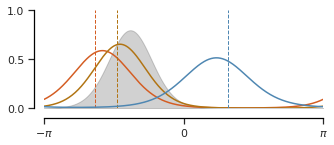

In [4]:
## HBM-1 Illustration ##

# values from test fit in notebook 34
presented = [-2, -1.5, 1]
mus = [-1.82787578, -1.43188571,  0.74040543]
kappas = [2.5, 3, 2]
ensemble_mean = -1.1998926672734782
ensemble_kappa = 4.285093359489942

fig, ax = plot_hbm_illustration(presented, mus, kappas, ensemble_mean, ensemble_kappa)

ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

set_export_style(fig, [ax], figsize=(5, 1.8))

if save_fig:
    plt.savefig('../figures/fig_03-01_hbm_illustration.png', bbox_inches='tight', dpi=800)

plt.show()

### Figure 4B. Set size 1 errors

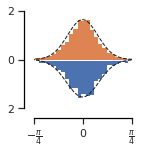

In [9]:
## Kappa_obs justification- set_size 1 distributions##

# dists
x_upper = df_free_cont[df_free_cont['set_size'] == 1]['error_rad'].dropna()
x_lower = df_rand_cont[df_rand_cont['set_size'] == 1]['error_rad'].dropna()

fig, ax = paired_hist(x_upper, x_lower, bins=90, density=True)

# fits
kappa_upper = 17
kappa_lower = 15
x = np.linspace(-np.pi/2, np.pi/2, 100)
pdf_upper = vonmises_pdf(x, 0, kappa_upper)
pdf_lower = vonmises_pdf(x, 0, kappa_lower)

ax.plot(x, pdf_upper, '--', c='k', linewidth=1)
ax.plot(x, -pdf_lower, '--', c='k', linewidth=1)

# format
ax.set_xlim([-np.pi/4, np.pi/4])
ax.set_xticks([-np.pi/4, 0, np.pi/4])
ax.set_xticklabels([r'$-\frac{\pi}{4}$', '0', r'$\frac{\pi}{4}$'])
ax.set_ylim([-2, 2])
ax.set_yticks([-2, 0, 2])
ax.set_yticklabels(['2', '0', '2'])

ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

set_export_style(fig, [ax])
set_axes_aspect(fig, [ax])

if save_fig:
    plt.savefig('../figures/fig_03-02_ss_1_error_fits.png', bbox_inches='tight', dpi=800)

plt.show()

### Figure 4B. VM fits to set size 1 errors

In [5]:
## Kappa_obs justification- vm fitting for all subs ##
df_vm_fit_free = fit_vm_by_sub(df_free_cont[df_free_cont['set_size'] == 1])
df_vm_fit_free['condition'] = 'free'
df_vm_fit_rand = fit_vm_by_sub(df_rand_cont[df_rand_cont['set_size'] == 1])
df_vm_fit_rand['condition'] = 'rand'
df_vm_fit = pd.concat([df_vm_fit_free, df_vm_fit_rand])

sub 39 complete: 100%|██████████| 17/17 [00:18<00:00,  1.09s/it]


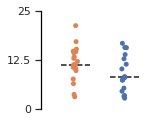

free median: 11.24   rand median: 8.04


In [6]:
## Kappa_obs justification- kappa estimates for all subs ##
free_median = np.round(df_vm_fit_free['kappa_hat'].median(), decimals=2)
rand_median = np.round(df_vm_fit_rand['kappa_hat'].median(), decimals=2)

ax = sns.stripplot(data=df_vm_fit, y='kappa_hat', x='condition', dodge=True, jitter=0.05, order=['free', 'rand'], palette={'free': FREE_COLOR, 'rand': RAND_COLOR})
fig = plt.gcf()
median_offset = 0.3 * np.array([-1, 1])

for tick, median in zip(ax.get_xticks(), [free_median, rand_median]):
    ax.plot([tick, tick] + median_offset, [median, median], '--', c='k')

ax.set_ylim([0, 25])
ax.set_yticks([0, 12.5, 25])
ax.set_yticklabels(['0', '12.5', '25'])
ax.set_xlim([-0.5, 1.5])
ax.set_xticklabels('')
ax.set_xticks([])

ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

set_export_style(fig, [ax])
set_axes_aspect(fig, [ax])

if save_fig:
    plt.savefig('../figures/fig_03-03_kappa_fits_by_sub.png', bbox_inches='tight', dpi=800)

plt.show()

print(f'free median: {free_median}   rand median: {rand_median}')